In [ ]:
import pandas as pd


if __name__ == '__main__':

	df_aaup    = pd.read_csv('http://lib.stat.cmu.edu/datasets/colleges/aaup.data', header=None)
	df_usnews  = pd.read_csv('http://lib.stat.cmu.edu/datasets/colleges/usnews.data', header=None)

aaup = df_aaup.rename(columns={
    0: 'FICE',
    1: 'College name',
    2: 'State',
    3: 'Type',
    4: 'Avg salary - full prof',
    5: 'Avg salary - assoc prof',
    6: 'Avg salary - asst prof',
    7: 'Avg salary - all ranks',
    8: 'Avg compensation - full prof',
    9: 'Avg compensation - assoc prof',
    10: 'Avg compensation - asst prof',
    11: 'Avg compensation - all ranks',
    12: 'No. of full prof',
    13: 'No. of assoc prof',
    14: 'No. of asst prof',
    15: 'No. of instructors',
    16: 'No. of faculty - all ranks'
})

new_names = ['fice', 'college_name', 'state', 'public_private', 'math_sat_avg', 'verbal_sat_avg',
             'combined_sat_avg', 'act_avg', 'math_sat_1st_quart', 'math_sat_3rd_quart',
             'verbal_sat_1st_quart', 'verbal_sat_3rd_quart', 'act_1st_quart', 'act_3rd_quart',
             'num_applications_received', 'num_applicants_accepted', 'num_new_students_enrolled',
             'pct_new_students_top_10', 'pct_new_students_top_25', 'num_fulltime_undergrads',
             'num_parttime_undergrads', 'instate_tuition', 'outstate_tuition', 'room_board_cost',
             'room_cost', 'board_cost', 'additional_fees', 'estimated_book_costs',
             'estimated_personal_spending', 'pct_faculty_phd', 'pct_faculty_terminal_degree',
             'student_faculty_ratio', 'pct_alumni_donate', 'instructional_expense_per_student',
             'graduation_rate']

usnews = df_usnews.rename(columns=dict(enumerate(new_names)))

cols=['math_sat_avg', 'verbal_sat_avg',
             'combined_sat_avg', 'act_avg', 'math_sat_1st_quart', 'math_sat_3rd_quart',
             'verbal_sat_1st_quart', 'verbal_sat_3rd_quart', 'act_1st_quart', 'act_3rd_quart',
             'num_applications_received', 'num_applicants_accepted', 'num_new_students_enrolled',
             'pct_new_students_top_10', 'pct_new_students_top_25', 'num_fulltime_undergrads',
             'num_parttime_undergrads', 'instate_tuition', 'outstate_tuition', 'room_board_cost',
             'room_cost', 'board_cost', 'additional_fees', 'estimated_book_costs',
             'estimated_personal_spending', 'pct_faculty_phd', 'pct_faculty_terminal_degree',
             'student_faculty_ratio', 'pct_alumni_donate', 'instructional_expense_per_student',
             'graduation_rate']
usnews[cols] = usnews[cols].apply(pd.to_numeric, errors='coerce', axis=1)
usnews['TotalExp']=usnews['instate_tuition']+usnews['room_board_cost']+usnews['room_cost']+ usnews['board_cost']+ usnews['additional_fees']+ usnews['estimated_book_costs']+usnews['estimated_personal_spending']


# usnews.to_csv('usnewsread.csv', index=False)
# aaup.to_csv('aaupread.csv', index=False)
print(aaup)


       FICE                  College name State Type Avg salary - full prof  \
0      1061     Alaska Pacific University    AK  IIB                    454   
1      1063         Univ.Alaska-Fairbanks    AK    I                    686   
2      1065         Univ.Alaska-Southeast    AK  IIA                    533   
3     11462         Univ.Alaska-Anchorage    AK  IIA                    612   
4      1002     Alabama Agri.&Mech. Univ.    AL  IIA                    442   
...     ...                           ...   ...  ...                    ...   
1156   3825  West Virginia Inst. of Tech.    WV  IIB                    408   
1157   3827      West Virginia University    WV    I                    535   
1158   3830  West Virginia Wesleyan Coll.    WV  IIB                    441   
1159   3831       Wheeling Jesuit College    WV  IIB                    403   
1160   3932         University of Wyoming    WY    I                    539   

     Avg salary - assoc prof Avg salary - asst prof

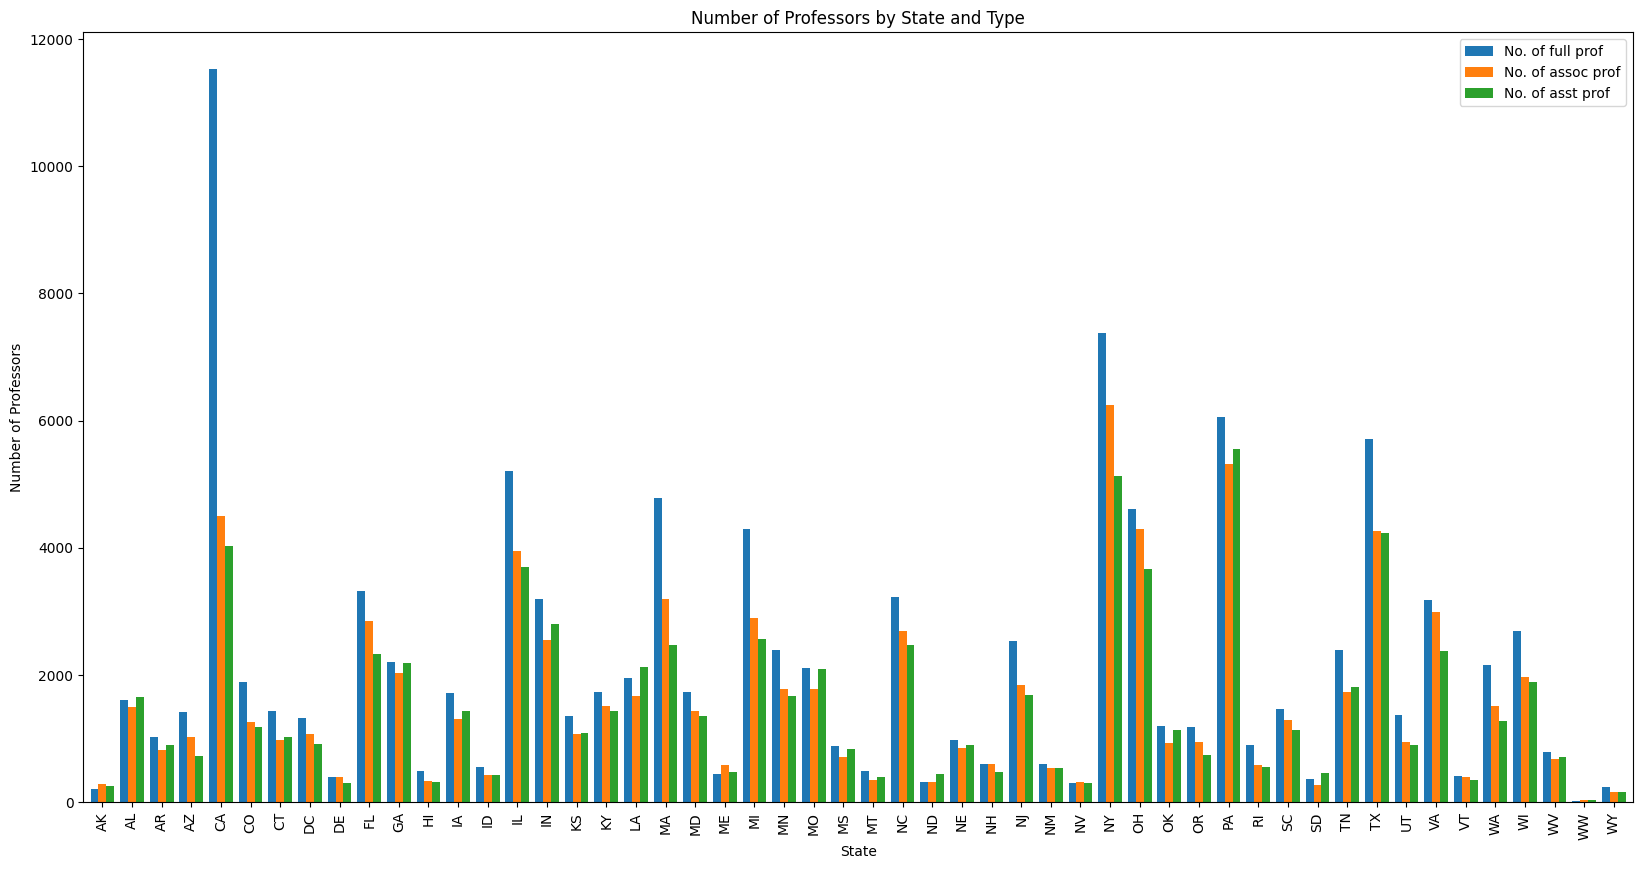

In [ ]:
import matplotlib.pyplot as plt
df_prof = aaup.groupby('State')[['No. of full prof', 'No. of assoc prof', 'No. of asst prof']].sum()


ax = df_prof.plot(kind='bar', figsize=(20,10), width=0.8)

ax.set_title('Number of Professors by State and Type')
ax.set_xlabel('State')
ax.set_ylabel('Number of Professors')

plt.show()